## Penjelasan Dataset yang digunakan

In [1]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

### Tweet Twitter terkait COVID-19 periode April hingga Juni 2021. 
##### 1. Analisis Sentimen terhadap Tweet terkait COVID-19. Data Tweet yang dikumpulkan selama periode April hingga Juni 2021. Tujuan Analisis	Untuk mengidentifikasi dan mengukur opini (positif, negatif, atau netral) publik di Twitter mengenai pandemi COVID-19 selama periode tersebut. Kolom Teks Utama	original_text (teks asli) . Data ini dapat diperoleh dari kaggle.


##### 2. Penjelasan Setiap Kolom Data

Berikut merupakan penjelasan untuk kolom-kolom kunci:
1. ID unik dari tweet tersebut.
2. created_at  Tanggal dan waktu tweet dibuat.
3. original_text teks tweet yang sebenarnya (sebelum pembersihan).Ini adalah kolom utama yang akan dianalisis.
4. clean_tweet teks tweet setelah melalui proses cleaning (menghilangkan link, tanda baca, dsb.). 
5. original_author  Pengguna yang membuat tweet tersebut.
6. retweet_count  Engagement Jumlah retweet yang diterima tweet tersebut.
7. favorite_count  Engagement Jumlah like (favorite) yang diterima tweet tersebut.
8. ompound  Skor sentimen gabungan (biasanya antara -1.0 dan 1.0), digunakan untuk menentukan polaritas.
9. neg Hasil  sentimen negatif (antara 0 dan 1).
10. neu Hasil  sentimen netral (antara 0 dan 1).
11. pos Hasil  sentimen positif (antara 0 dan 1).
12. sentiment Label polaritas akhir (misalnya, 'Positif', 'Negatif', 'Netral') yang diturunkan dari skor-skor di atas.

##### 3. Import Library

In [2]:
# Untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Untuk visualisasi (opsional, tapi disarankan)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


#tokenisasi
import nltk
from nltk.tokenize import word_tokenize
#lemmatization
from nltk.stem import WordNetLemmatizer
#stemming
from nltk.stem import PorterStemmer

from nltk.corpus import stopwords
import string
import re 
#labeling
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
#bert
from transformers import pipeline 


# Untuk Natural Language Processing (NLP) dan Sentimen
# NLTK adalah salah satu library dasar
import nltk
nltk.download('wordnet')
#untuk labeling
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt


from nltk.sentiment.vader import SentimentIntensityAnalyzer # Algoritma sentimen populer
# Atau library yang lebih canggih seperti transformer dari Hugging Face
# from transformers import pipeline
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package wordnet to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### 4. Load Data

In [3]:

# Tentukan path file CSV Anda
file_path = 'Covid-19 Twitter Dataset (Apr-Jun 2021).csv'

# Nama kolom yang ingin digunakan
kolom_teks = 'original_text'
kolom_tanggal = 'created_at'

try:
    # Membaca dataset hanya dengan kolom tertentu
    df = pd.read_csv(
        file_path,
        encoding='utf-8',
        usecols=[kolom_teks, kolom_tanggal],  # hanya ambil dua kolom
        parse_dates=[kolom_tanggal]           # parsing kolom tanggal
    )
    
    # Menampilkan beberapa baris pertama
    print(" Data berhasil dimuat. Berikut 5 baris pertama:")
    display(df.head())  # gunakan display() biar tabel rapi di Jupyter
    
    # Info dataset
    print("\n=====================")
    print(" Info Dataset:")
    df.info()

except FileNotFoundError:
    print(f" Error: File '{file_path}' tidak ditemukan.")
    print("Pastikan file tersebut ada di direktori yang sama dengan script Anda.")
except ValueError as e:
    print(f" Kolom tidak ditemukan dalam file: {e}")
except Exception as e:
    print(f" Terjadi error saat memuat data: {e}")


 Data berhasil dimuat. Berikut 5 baris pertama:


,created_at,original_text
0,2021-04-26,RT @VP: The U.S. is working closely with the Indian government to rapidly deploy additional support and supplies during an alarming COVID-1…
1,2021-04-26,RT @JackPosobiec: Flip-Flop Fauci admits outdoor COVID transmission is very low https://t.co/6ztO7pOH1i
2,2021-04-26,"RT @timmy315: Hi Twitter, I’m Tim Manning, the White House COVID-19 Supply Coordinator. There’s been a lot of confusion around the use of t…"
3,2021-04-26,RT @itsaadee: Praying for #India as the country battles the worst #Covid-19 surge the world has witnessed. Let's all - irrespective of the…
4,2021-04-26,Rapid Investment in Nursing to Strengthen the Global COVID-19 Response https://t.co/z0mDQDGgTu



 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147475 entries, 0 to 147474
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   created_at     147475 non-null  datetime64[ns]
 1   original_text  147475 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.3+ MB


## Data Understanding

In [111]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

#### 1. Jumlah Baris Data

In [4]:
# 1. Jumlah baris data
jumlah_baris = len(df)
print(f"Jumlah total baris data (tweet): {jumlah_baris}")


Jumlah total baris data (tweet): 147475


#### 2. Panjang Rata - Rata Setiap Baris

In [5]:
# 2. Panjang rata-rata setiap baris (berdasarkan jumlah karakter)
df['text_length'] = df['original_text'].astype(str).apply(len)
rata_panjang = df['text_length'].mean()

print(f"Panjang rata-rata setiap baris (tweet): {rata_panjang:.2f} karakter")


Panjang rata-rata setiap baris (tweet): 131.62 karakter


#### 3. Cek Data Duplikasi

In [6]:
# 3. Cek data duplikasi
duplikat = df.duplicated(subset='original_text').sum()
print(f"Jumlah data duplikat berdasarkan kolom original_text: {duplikat}")


Jumlah data duplikat berdasarkan kolom original_text: 0


#### 4. Cek Data Kosong

In [7]:
# 4. Cek data kosong
print("Jumlah data kosong (NaN) per kolom:")
print(df.isnull().sum())

Jumlah data kosong (NaN) per kolom:
created_at       0
original_text    0
text_length      0
dtype: int64


#### 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

#### Line Chart

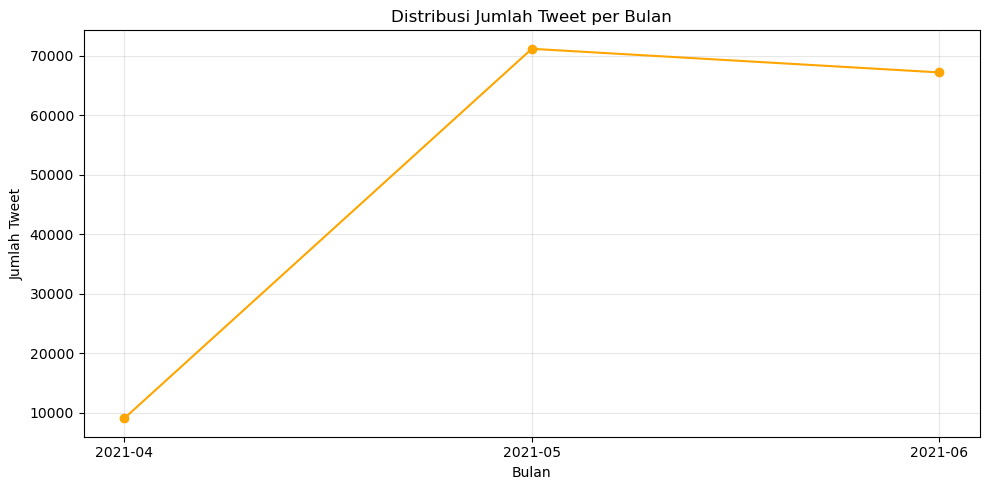

In [8]:
# berdasarkan bulan
tweet_per_bulan = df.groupby(df['created_at'].dt.to_period('M')).size()

plt.figure(figsize=(10,5))
plt.plot(tweet_per_bulan.index.astype(str), tweet_per_bulan.values, marker='o', color='orange')
plt.title('Distribusi Jumlah Tweet per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Tweet')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Word Cloud

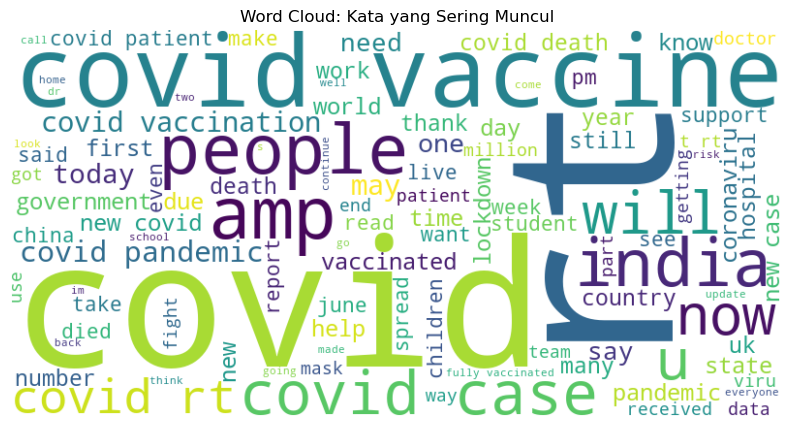

In [9]:

# Bersihkan teks sederhana (hapus simbol, angka, dan tanda baca)
def bersihkan_teks(teks):
    teks = str(teks).lower()
    teks = re.sub(r'http\S+', '', teks)          # hapus link
    teks = re.sub(r'[^a-z\s]', '', teks)         # hapus angka dan simbol
    return teks

df['clean_text'] = df['original_text'].apply(bersihkan_teks)

# Gabungkan semua teks menjadi satu string besar
all_words = ' '.join(df['clean_text'])

# Buat wordcloud
plt.figure(figsize=(10,6))
wc = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Kata yang Sering Muncul')
plt.show()


#### Bar Chart

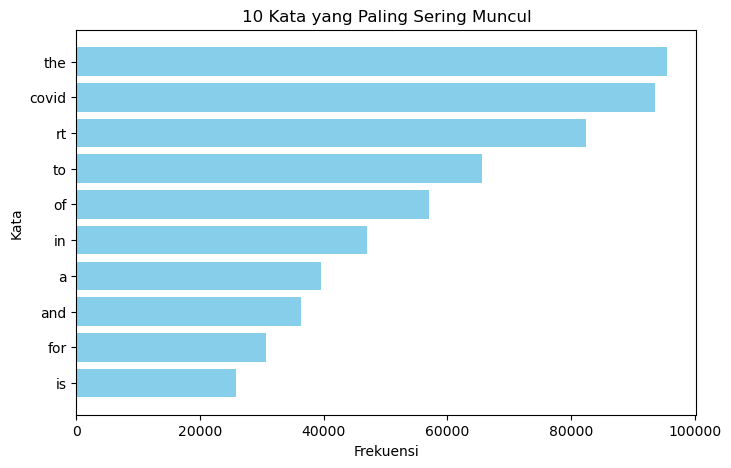

In [11]:

# Hitung frekuensi kata
word_counts = Counter(all_words.split())
kata_teratas = dict(word_counts.most_common(10))

plt.figure(figsize=(8,5))
plt.barh(list(kata_teratas.keys()), list(kata_teratas.values()), color='skyblue')
plt.title('10 Kata yang Paling Sering Muncul')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.gca().invert_yaxis()
plt.show()


## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

#### 1. Tokenisasi 

In [10]:
nltk.download('punkt')

# Tokenisasi
df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(str(x)))
print("Contoh hasil tokenisasi:")
print(df['tokens'].head())


[nltk_data] Downloading package punkt to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Contoh hasil tokenisasi:
0    [rt, vp, the, us, is, working, closely, with, the, indian, government, to, rapidly, deploy, additional, support, and, supplies, during, an, alarming, covid]
1                                                                        [rt, jackposobiec, flipflop, fauci, admits, outdoor, covid, transmission, is, very, low]
2         [rt, timmy, hi, twitter, im, tim, manning, the, white, house, covid, supply, coordinator, theres, been, a, lot, of, confusion, around, the, use, of, t]
3          [rt, itsaadee, praying, for, india, as, the, country, battles, the, worst, covid, surge, the, world, has, witnessed, lets, all, irrespective, of, the]
4                                                                                  [rapid, investment, in, nursing, to, strengthen, the, global, covid, response]
Name: tokens, dtype: object


#### 2. Lemmatization 

In [11]:
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(t) for t in tokens])
print("Contoh hasil lemmatization:")
print(df['lemmatized'].head())


[nltk_data] Downloading package wordnet to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Contoh hasil lemmatization:
0    [rt, vp, the, u, is, working, closely, with, the, indian, government, to, rapidly, deploy, additional, support, and, supply, during, an, alarming, covid]
1                                                                     [rt, jackposobiec, flipflop, fauci, admits, outdoor, covid, transmission, is, very, low]
2       [rt, timmy, hi, twitter, im, tim, manning, the, white, house, covid, supply, coordinator, there, been, a, lot, of, confusion, around, the, use, of, t]
3           [rt, itsaadee, praying, for, india, a, the, country, battle, the, worst, covid, surge, the, world, ha, witnessed, let, all, irrespective, of, the]
4                                                                               [rapid, investment, in, nursing, to, strengthen, the, global, covid, response]
Name: lemmatized, dtype: object


#### 3. Stemming

In [12]:
stemmer = PorterStemmer()

df['stemmed'] = df['tokens'].apply(lambda tokens: [stemmer.stem(t) for t in tokens])
print("Contoh hasil stemming:")
print(df['stemmed'].head())


Contoh hasil stemming:
0       [rt, vp, the, us, is, work, close, with, the, indian, govern, to, rapidli, deploy, addit, support, and, suppli, dure, an, alarm, covid]
1                                                          [rt, jackposobiec, flipflop, fauci, admit, outdoor, covid, transmiss, is, veri, low]
2    [rt, timmi, hi, twitter, im, tim, man, the, white, hous, covid, suppli, coordin, there, been, a, lot, of, confus, around, the, use, of, t]
3          [rt, itsaade, pray, for, india, as, the, countri, battl, the, worst, covid, surg, the, world, ha, wit, let, all, irrespect, of, the]
4                                                                        [rapid, invest, in, nurs, to, strengthen, the, global, covid, respons]
Name: stemmed, dtype: object


#### 4. Stopword Removal (Tanda Baca, Angka, dan Kata)

In [15]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def bersihkan_kata(tokens):
    return [
        t for t in tokens
        if t not in stop_words
        and t not in string.punctuation
        and not re.match(r'^\d+$', t)
    ]

df['clean_tokens'] = df['lemmatized'].apply(bersihkan_kata)
print("Contoh hasil stopword removal:")
print(df['clean_tokens'].head())


[nltk_data] Downloading package stopwords to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Contoh hasil stopword removal:
0     [rt, vp, u, working, closely, indian, government, rapidly, deploy, additional, support, supply, alarming, covid]
1                                       [rt, jackposobiec, flipflop, fauci, admits, outdoor, covid, transmission, low]
2    [rt, timmy, hi, twitter, im, tim, manning, white, house, covid, supply, coordinator, lot, confusion, around, use]
3        [rt, itsaadee, praying, india, country, battle, worst, covid, surge, world, ha, witnessed, let, irrespective]
4                                                    [rapid, investment, nursing, strengthen, global, covid, response]
Name: clean_tokens, dtype: object


#### 5. Text Normalisasi
Mengubah teks ke bentuk standar (huruf kecil, hapus spasi berlebih, singkatan umum, dsb).

In [16]:
def normalisasi_teks(teks):
    teks = teks.lower()
    teks = re.sub(r'http\S+', '', teks)          # hapus URL
    teks = re.sub(r'@\w+', '', teks)             # hapus mention
    teks = re.sub(r'#\w+', '', teks)             # hapus hashtag
    teks = re.sub(r'[^a-z\s]', '', teks)         # hapus tanda baca & angka
    teks = re.sub(r'\s+', ' ', teks).strip()     # rapikan spasi
    return teks

df['normalized_text'] = df['original_text'].apply(normalisasi_teks)
print("Contoh hasil normalisasi teks:")
print(df['normalized_text'].head())


Contoh hasil normalisasi teks:
0    rt the us is working closely with the indian government to rapidly deploy additional support and supplies during an alarming covid
1                                                                       rt flipflop fauci admits outdoor covid transmission is very low
2              rt hi twitter im tim manning the white house covid supply coordinator theres been a lot of confusion around the use of t
3                            rt praying for as the country battles the worst surge the world has witnessed lets all irrespective of the
4                                                                   rapid investment in nursing to strengthen the global covid response
Name: normalized_text, dtype: object


#### 6. Labeling Data 

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Inisialisasi analyzer
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(teks):
    skor = analyzer.polarity_scores(teks)
    compound = skor['compound']  # nilai keseluruhan sentimen (-1 s/d +1)
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Terapkan pada kolom teks bersih
df['sentimen'] = df['clean_tokens'].apply(get_vader_sentiment)

# Lihat hasil
print("Contoh hasil labeling dengan VADER:")
print(df[['clean_tokens', 'sentimen']].head())


Contoh hasil labeling dengan VADER:
                                                                                                        clean_tokens  \
0   [rt, vp, u, working, closely, indian, government, rapidly, deploy, additional, support, supply, alarming, covid]   
1                                     [rt, jackposobiec, flipflop, fauci, admits, outdoor, covid, transmission, low]   
2  [rt, timmy, hi, twitter, im, tim, manning, white, house, covid, supply, coordinator, lot, confusion, around, use]   
3      [rt, itsaadee, praying, india, country, battle, worst, covid, surge, world, ha, witnessed, let, irrespective]   
4                                                  [rapid, investment, nursing, strengthen, global, covid, response]   

  sentimen  
0  Neutral  
1  Neutral  
2  Neutral  
3  Neutral  
4  Neutral  


#### 7. Text Vektorisasi

In [2]:

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['normalized_text'])
y = df['sentimen']

print("Bentuk hasil vektorisasi TF-IDF:", X.shape)

NameError: name 'TfidfVectorizer' is not defined

#### 8. Data Splitting

In [21]:

# Pilih skala split (contoh: 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (117980, 5000)
Ukuran data uji: (29495, 5000)


#### 9. Matrix Correlation 

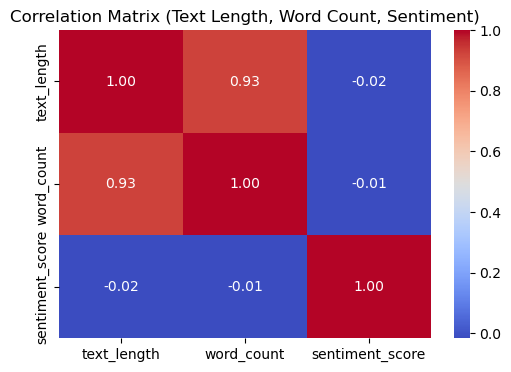

In [22]:

# Buat fitur numerik tambahan
df['text_length'] = df['normalized_text'].apply(len)
df['word_count'] = df['normalized_text'].apply(lambda x: len(x.split()))

# Konversi label sentimen ke angka
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment_score'] = df['sentimen'].map(sentiment_map)

# Hitung korelasi
corr_matrix = df[['text_length', 'word_count', 'sentiment_score']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Text Length, Word Count, Sentiment)")
plt.show()


## Data Modeling

In [3]:
# Berikan Penjelasan tentang model yang dipilih

#### Penjelasan Model

Model yang digunakan adalah Support Vector Machine (SVM), dimana algoritma ini merupakan pembelajaran terawasi (supervised learning) yang sangat efektif untuk tugas klasifikasi dan regresi, terutama dalam ruang fitur berdimensi tinggi, seperti data csv yang divetorisasi menggunakan TF-IDF.

##### 1. Konsep Dasar: Hyperplane dan Margin 
Tujuan utama SVM adalah menemukan hyperplane (bidang pemisah) terbaik yang membagi kelas-kelas data (Positif, Negatif, Netral) dalam ruang $N$-dimensi.Hyperplane: Batas keputusan yang memisahkan titik data dari kelas yang berbeda.Margin: Jarak antara hyperplane dan titik data terdekat dari setiap kelas. Titik data terdekat ini disebut Support Vectors.Optimal Hyperplane: SVM mencari hyperplane yang memiliki margin terbesar. Margin yang besar memberikan batas keputusan yang lebih kokoh dan membantu model memiliki kemampuan generalisasi yang lebih baik ke data baru.

##### 2. Penerapan SVM pada Data Teks (TF-IDF)

Dalam proyek Anda, data input ke SVM adalah matriks numerik yang dihasilkan dari TF-IDF Vectorization 
($X_{\text{train}}$ dan $X_{\text{test}}$).Fitur: Setiap dimensi (kolom) dalam matriks TF-IDF merepresentasikan bobot pentingnya suatu kata dalam kalimat (fitur). Karena TF-IDF biasanya menghasilkan ribuan fitur (kata unik), data Anda berada dalam ruang berdimensi tinggi.Proses: SVM menggunakan bobot-bobot TF-IDF ini untuk menentukan bagaimana setiap kalimat (data point) ditempatkan di ruang fitur. Kemudian, ia menemukan hyperplane optimal yang memisahkan kalimat-kalimat yang memiliki sentimen berbeda (misalnya, memisahkan kalimat "Netral" dari "Positif").

##### 3. Kernel Trick (Penanganan Data Non-Linier)

Salah satu kekuatan terbesar SVM adalah kemampuannya menangani data yang tidak dapat dipisahkan secara linier (data yang tidak bisa dipisah hanya dengan garis lurus atau bidang datar).

Fungsi Kernel: Melalui teknik yang disebut Kernel Trick, SVM secara implisit memetakan data Anda ke ruang berdimensi lebih tinggi. Di ruang baru ini, data non-linier menjadi dapat dipisahkan secara linier.

Pilihan Kernel: Untuk data TF-IDF (yang cenderung sudah cukup linier), kernel Linear seringkali merupakan pilihan yang cepat dan efektif. Namun, kernel seperti Radial Basis Function (RBF) dapat digunakan jika batas pemisahan sentimen ternyata kompleks.

##### 4. SVM

In [23]:
import joblib
# Vektorisasi teks
# vectorizer = TfidfVectorizer(max_features=5000)
# X = vectorizer.fit_transform(df['normalized_text'])
# y = df['sentimen']

# Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Prediksi
y_pred_svm = svm_model.predict(X_test)

# Evaluasi
print("=== Evaluasi Model SVM ===")
print("Akurasi:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


# Simpan vectorizer dan model
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

print("Model dan vectorizer berhasil disimpan!")


=== Evaluasi Model SVM ===
Akurasi: 0.9998982878453975


c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       1.00      1.00      1.00     29492
    Positive       0.00      0.00      0.00         2

    accuracy                           1.00     29495
   macro avg       0.33      0.33      0.33     29495
weighted avg       1.00      1.00      1.00     29495

Model dan vectorizer berhasil disimpan!


In [ ]:
from transformers import pipeline

# 1. Muat model BERT yang lebih baik untuk sentimen Twitter
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# 2. Ambil semua teks yang sudah dinormalisasi (dari cell 5a1d9101)
# Gunakan .tolist() agar lebih cepat diproses oleh pipeline
texts = df['normalized_text'].tolist()

# 3. Prediksi sentimen (mungkin butuh waktu beberapa menit)
# Gunakan batch_size untuk mempercepat jika Anda memiliki GPU
bert_results = sentiment_model(texts, batch_size=32) 

# 4. Buat mapping label
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

# 5. Buat kolom 'sentimen' baru berdasarkan hasil BERT
df['sentimen_bert'] = [label_map[r['label']] for r in bert_results]

# 6. Lihat distribusi baru (PASTI akan jauh lebih seimbang)
print("Distribusi Sentimen Baru (dari BERT):")
print(df['sentimen_bert'].value_counts())

Device set to use cpu


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------------------------------------------
# 7. Tentukan "Kunci Jawaban" (Ground Truth)
#    !! SANGAT PENTING !!
#    Ganti 'sentimen_asli' dengan NAMA KOLOM di 'df' Anda
#    yang berisi label sentimen yang sebenarnya/manual.
# -----------------------------------------------------------------
NAMA_KOLOM_LABEL_ASLI_ANDA = 'sentimen_bert' # <-- GANTI INI
# -----------------------------------------------------------------

# Periksa apakah kolom-kolomnya siap
if NAMA_KOLOM_LABEL_ASLI_ANDA not in df.columns:
    print(f"ERROR: Kolom '{NAMA_KOLOM_LABEL_ASLI_ANDA}' tidak ditemukan di DataFrame.")
    print("Silakan ganti NAMA_KOLOM_LABEL_ASLI_ANDA di dalam kode Langkah 2.")
elif 'sentimen_bert' not in df.columns:
    print("ERROR: Kolom 'sentimen_bert' tidak ditemukan.")
    print("Pastikan Anda menjalankan Langkah 1 terlebih dahulu.")
else:
    # 8. Siapkan y_true (label sebenarnya) dan y_pred (label prediksi)
    true_labels = df[NAMA_KOLOM_LABEL_ASLI_ANDA]
    predicted_labels = df['sentimen_bert']

    # (Opsional: Lakukan standarisasi jika formatnya beda,
    #  misal 'positive' vs 'Positive'. Contoh:
    #  true_labels = true_labels.str.capitalize()
    # )

    # 9. Cetak Laporan Klasifikasi (Akurasi, Precision, Recall, F1)
    print("\n" + "="*50)
    print(f"Langkah 2 Selesai: Laporan Klasifikasi")
    print(f"(Membandingkan '{NAMA_KOLOM_LABEL_ASLI_ANDA}' vs. 'sentimen_bert')")
    print("="*50)
    
    # Ini adalah fungsi yang menghasilkan SEMUA metrik yang Anda minta
    print(classification_report(true_labels, predicted_labels, digits=4))
    
    # 10. Cetak Confusion Matrix
    print("\n" + "="*50)
    print("CONFUSION MATRIX:")
    print("="*50)
    # Baris = Label Sebenarnya, Kolom = Label Prediksi
    # (Pastikan 'labels' ini sesuai dengan isi data Anda)
    print(confusion_matrix(true_labels, predicted_labels, labels=["Positive", "Neutral", "Negative"]))

#### 5. Bert (Model Deep Learing)

In [ ]:
from transformers import pipeline

# Gunakan IndoBERT jika dataset berbahasa Indonesia
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Ambil beberapa contoh teks
sample_texts = df['normalized_text'].sample(10).tolist()

# Prediksi sentimen
results = sentiment_model(sample_texts)

# Gabungkan hasil
for text, result in zip(sample_texts, results):
    print(f"Teks: {text}\nSentimen: {result['label']}, Skor: {result['score']:.4f}\n")


Device set to use cpu


Teks: if you are wearing a face diaper it means you are a dirty person your face diaper is making you sick and you don
Sentimen: LABEL_0, Skor: 0.9690

Teks: dont lose hope pray for the betterment of covid
Sentimen: LABEL_2, Skor: 0.6560

Teks: air nz staff isolating after covid exposure
Sentimen: LABEL_1, Skor: 0.6804

Teks: billion corona virus vaccine doses have now been administered worldwide all thanks to medical teams who are re
Sentimen: LABEL_2, Skor: 0.6733

Teks: is open for covid vaccinations walk in or schedule appointment walkins monfri ampm di
Sentimen: LABEL_1, Skor: 0.9516

Teks: covid zero daily coronavirus deaths reported in england scotland and northern ireland uk news sky news
Sentimen: LABEL_0, Skor: 0.5902

Teks: i reject this idea that only trump suspected the chinese gov of foul play concerning the origin of covid in r
Sentimen: LABEL_0, Skor: 0.6914

Teks: rt as a mark of respect amp gratitude towards the frontline warriors working in svbph amp base hospital de

##### Perandingkan hasil kedua model
Model ini dari Cardiff NLP, dilatih khusus untuk tweet bahasa Inggris (sama seperti dataset kamu!)
Label-nya:

1. LABEL_0: Negative
2. LABEL_1: Neutral
3. LABEL_2: Positive

In [26]:

# Ambil subset kecil biar cepat
subset = df.sample(100, random_state=42).copy()

# SVM prediction
subset['svm_pred'] = svm_model.predict(vectorizer.transform(subset['normalized_text']))

# BERT prediction
bert_results = sentiment_model(subset['normalized_text'].tolist())
subset['bert_pred'] = [r['label'] for r in bert_results]

# Bandingkan hasil
print(subset[['normalized_text', 'svm_pred', 'bert_pred']].head(10))


                                                                                                             normalized_text  \
114953                                                                                                rt covid made in china   
47412     rt j k dutt man who lead nsg during mumbai attack died due to covid complications he had famously said i wish i ha   
10507                                                          friends who met at u of a student paper pen book during covid   
104918  rt joints for jabs adults in washington state can claim a free marijuana joint when they receive a covid vaccine the   
36471      in april the american college health association formally recommended colleges mandate the shot warning that scho   
110550         atlantic university sport optimistic athletes can return to fields rinks arenas and tracks starting this fall   
93466                                                                             eco cherry cherry toma

## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

In [1]:
subset['bert_pred']

NameError: name 'subset' is not defined

#### 1. Confussion Matrix

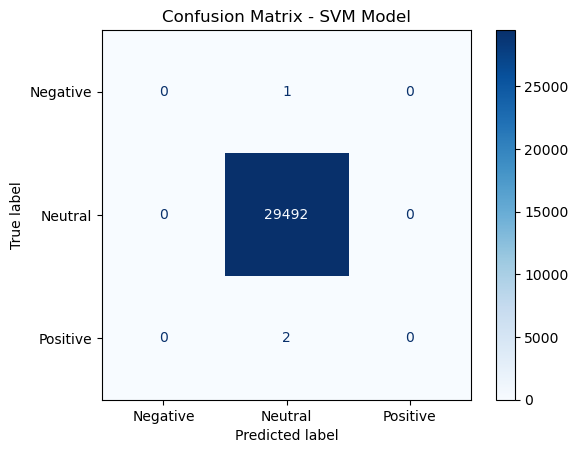

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_svm, labels=['Negative', 'Neutral', 'Positive'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])

disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - SVM Model')
plt.show()


#### 2. Laporan Klasifikasi

In [28]:
from sklearn.metrics import classification_report

print("=== Classification Report (SVM) ===")
print(classification_report(y_test, y_pred_svm, target_names=['Negative', 'Neutral', 'Positive']))


=== Classification Report (SVM) ===


c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       1.00      1.00      1.00     29492
    Positive       0.00      0.00      0.00         2

    accuracy                           1.00     29495
   macro avg       0.33      0.33      0.33     29495
weighted avg       1.00      1.00      1.00     29495



c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## Data Prediksi

In [ ]:
# Gunakan model yang sudah dibuat dan prediksi pada data baru

#### 1. Menambahkan Data Baru 
Data baru perkalimat 

#### Data Prediksi dengan Machine Learning

In [29]:
# Contoh data baru
data_baru = [
    "Finally got my covid vaccine today! Feeling great.",
    "Lockdowns are so frustrating and useless.",
    "Hospitals are doing their best to handle the crisis."
]

# Transformasi teks baru ke bentuk TF-IDF
data_baru_tfidf = vectorizer.transform(data_baru)

# Prediksi sentimen
prediksi_svm = svm_model.predict(data_baru_tfidf)

# Tampilkan hasil
for teks, label in zip(data_baru, prediksi_svm):
    print(f"Teks: {teks}\nPrediksi Sentimen (SVM): {label}\n")


Teks: Finally got my covid vaccine today! Feeling great.
Prediksi Sentimen (SVM): Neutral

Teks: Lockdowns are so frustrating and useless.
Prediksi Sentimen (SVM): Neutral

Teks: Hospitals are doing their best to handle the crisis.
Prediksi Sentimen (SVM): Neutral



#### Data Prediksi dengan Deep Learning

In [30]:
# Contoh teks baru (tweet)
data_baru = [
    "Finally got my covid vaccine today! Feeling great.",
    "Lockdowns are so frustrating and useless.",
    "Hospitals are doing their best to handle the crisis."
]

# Prediksi sentimen
hasil_prediksi = sentiment_model(data_baru)

# Tampilkan hasil
for teks, hasil in zip(data_baru, hasil_prediksi):
    print(f"Teks: {teks}")
    print(f"Prediksi Sentimen (BERT): {hasil['label']}, Skor: {hasil['score']:.4f}\n")


Teks: Finally got my covid vaccine today! Feeling great.
Prediksi Sentimen (BERT): LABEL_2, Skor: 0.9841

Teks: Lockdowns are so frustrating and useless.
Prediksi Sentimen (BERT): LABEL_0, Skor: 0.9783

Teks: Hospitals are doing their best to handle the crisis.
Prediksi Sentimen (BERT): LABEL_1, Skor: 0.4961



##### 2. Data dari kaggle yang sama

##### A. Menggunakan Model Machine Learning

In [31]:
import joblib
# === Fungsi Preprocessing ===
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# === 1. Load data baru ===
file_prediksi = 'Covid-19 Twitter Dataset (Apr-Jun 2020).csv'
df_prediksi = pd.read_csv(file_prediksi)

# === 2. Bersihkan teks ===
df_prediksi['clean_text'] = df_prediksi['original_text'].apply(clean_text)

# === 3. Load vectorizer dan model ===
vectorizer = joblib.load('tfidf_vectorizer.pkl')
svm_model = joblib.load('svm_model.pkl')

# === 4. Transform dan prediksi ===
X_pred = vectorizer.transform(df_prediksi['clean_text'])
df_prediksi['prediksi_sentimen'] = svm_model.predict(X_pred)

# === 5. Simpan hasil ===
df_prediksi.to_csv('hasil_prediksi_svm.csv', index=False)
print(" Prediksi selesai. Hasil disimpan di 'hasil_prediksi_svm.csv'")

# === 6. Lihat contoh hasil ===
print(df_prediksi[['original_text', 'clean_text', 'prediksi_sentimen']].head(10))


 Prediksi selesai. Hasil disimpan di 'hasil_prediksi_svm.csv'
                                                                                                                                  original_text  \
0   RT @GlblCtzn: .@priyankachopra is calling on leaders to help protect refugees from COVID-19 by providing them with quality health care and…   
1                          RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-NIRSAL COVID-19 TARGETED CREDIT FACILITY - TCF https://t.co/koWBQECoQq   
2   RT @AdvoBarryRoux: These 5 police officials based at Namahadi police station were busy drinking liquor at a certain tavern whilst on duty,…   
3                                                               RT @MobilePunch: COVID-19: Oyo discharges two patients\nhttps://t.co/eQRE00ZiJo   
4                                                                          My Condolences to the Family of those who did not survive #Covid_19!   
5  RT @DrJMZimmerman: I received this text from my 19 ye

#### Virtualisasi

sentimen
Neutral     147453
Positive        16
Negative         6
Name: count, dtype: int64


C:\Users\Dede Ahmad Maolana\AppData\Local\Temp\ipykernel_1800\3236892883.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimen', data=df, palette='coolwarm')


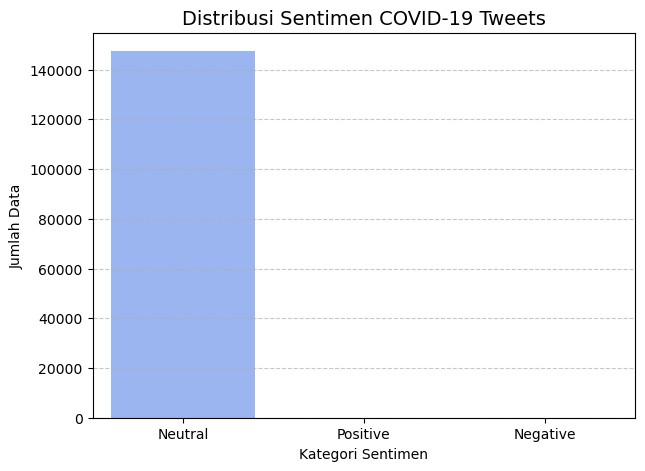

In [32]:

# Pastikan kolom sentimen sudah ada
print(df['sentimen'].value_counts())

# Visualisasi jumlah masing-masing sentimen
plt.figure(figsize=(7,5))
sns.countplot(x='sentimen', data=df, palette='coolwarm')

plt.title('Distribusi Sentimen COVID-19 Tweets', fontsize=14)
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### B. Menggunakan Model Deep Learning

In [ ]:
from transformers import pipeline
import pandas as pd

# === 1. Load CSV baru ===
file_prediksi = 'Covid-19 Twitter Dataset (Apr-Jun 2020).csv'
df_prediksi = pd.read_csv(file_prediksi)

# === 2. Load model BERT ===
sentiment_model = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment"
)

# === 3. Prediksi setiap teks ===
texts = df_prediksi['original_text'].astype(str).tolist()
predictions = sentiment_model(texts)

# === 4. Konversi hasil ke DataFrame ===
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

df_prediksi['label'] = [label_map[p['label']] for p in predictions]
df_prediksi['score'] = [p['score'] for p in predictions]

# === 5. Simpan hasil ===
df_prediksi.to_csv("hasil_prediksi_bert.csv", index=False)
print("Prediksi selesai. Hasil disimpan di 'hasil_prediksi_bert.csv'")

# === 6. Lihat contoh hasil ===
print(df_prediksi[['original_text', 'label', 'score']].head(10))


Device set to use cpu


##### Visualisasi

In [ ]:


plt.figure(figsize=(7,5))
sns.countplot(x='bert_sentiment', data=df, palette='mako')

plt.title('Distribusi Sentimen COVID-19 dengan Model BERT', fontsize=14, weight='bold')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Tweet')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
